<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n20.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.098787,79.268431,27.489083,148.856301,123.674623,25.181678
1,0.0,1.0,90.028000,58.462227,16.238583,174.728810,156.631084,18.097726
2,0.0,2.0,48.371334,36.215648,-3.956058,90.630923,102.566481,-11.935558
3,0.0,3.0,53.815299,25.878314,12.539683,102.233295,98.822992,3.410303
4,0.0,4.0,29.607527,79.878613,49.366378,168.852519,122.025065,46.827453
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.967404,51.642274,-11.756226,88.853452,95.658784,-6.805333
19996,999.0,16.0,54.647625,36.639423,-18.537682,82.749366,99.408095,-16.658729
19997,999.0,17.0,76.467409,97.316012,38.799493,222.582913,189.262897,33.320016
19998,999.0,18.0,29.096282,38.082528,-20.713369,56.465440,69.424213,-12.958772


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.098787,79.268431,27.489083,148.856301,123.674623,25.181678
1,0.0,1.0,90.028000,58.462227,16.238583,174.728810,156.631084,18.097726
2,0.0,2.0,48.371334,36.215648,-3.956058,90.630923,102.566481,-11.935558
3,0.0,3.0,53.815299,25.878314,12.539683,102.233295,98.822992,3.410303
4,0.0,4.0,29.607527,79.878613,49.366378,168.852519,122.025065,46.827453
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.967404,51.642274,-11.756226,88.853452,95.658784,-6.805333
19996,999.0,16.0,54.647625,36.639423,-18.537682,82.749366,99.408095,-16.658729
19997,999.0,17.0,76.467409,97.316012,38.799493,222.582913,189.262897,33.320016
19998,999.0,18.0,29.096282,38.082528,-20.713369,56.465440,69.424213,-12.958772


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    32.098787  79.268431  27.489083  148.856301  123.674623   
      1.0    90.028000  58.462227  16.238583  174.728810  156.631084   
      2.0    48.371334  36.215648  -3.956058   90.630923  102.566481   
      3.0    53.815299  25.878314  12.539683  102.233295   98.822992   
      4.0    29.607527  79.878613  49.366378  168.852519  122.025065   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.967404  51.642274 -11.756226   88.853452   95.658784   
      16.0   54.647625  36.639423 -18.537682   82.749366   99.408095   
      17.0   76.467409  97.316012  38.799493  222.582913  189.262897   
      18.0   29.096282  38.082528 -20.713369   56.465440   69.424213   
      19.0   88.622970  22.225829  -3.709844  117.138955  126.310182   

                 e_hat  
rep   index             
0.0   0.0    25.181678  
      1.0    18.097726  
      2.0   -11.935558  
      3.0     3.410303  
      4.0    46.827453  
...                ...  
999.0 15.0   -6.805333  
      16.0  -16.658729  
      17.0   33.320016  
      18.0  -12.958772  
      19.0   -9.171228  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    32.098787  79.268431  27.489083  148.856301  123.674623   
      1.0    90.028000  58.462227  16.238583  174.728810  156.631084   
      2.0    48.371334  36.215648  -3.956058   90.630923  102.566481   
      3.0    53.815299  25.878314  12.539683  102.233295   98.822992   
      4.0    29.607527  79.878613  49.366378  168.852519  122.025065   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.967404  51.642274 -11.756226   88.853452   95.658784   
      16.0   54.647625  36.639423 -18.537682   82.749366   99.408095   
      17.0   76.467409  97.316012  38.799493  222.582913  189.262897   
      18.0   29.096282  38.082528 -20.713369   56.465440   69.424213   
      19.0   88.622970  22.225829  -3.709844  117.138955  126.310182   

                 e_hat  
rep   index             
0.0   0.0    25.181678  
      1.0    18.097726  
      2.0   -11.935558  
      3.0     3.410303  
      4.0    46.827453  
...                ...  
999.0 15.0   -6.805333  
      16.0  -16.658729  
      17.0   33.320016  
      18.0  -12.958772  
      19.0   -9.171228  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.098787,79.268431,27.489083,148.856301,123.674623,25.181678
1,0.0,1.0,90.028000,58.462227,16.238583,174.728810,156.631084,18.097726
2,0.0,2.0,48.371334,36.215648,-3.956058,90.630923,102.566481,-11.935558
3,0.0,3.0,53.815299,25.878314,12.539683,102.233295,98.822992,3.410303
4,0.0,4.0,29.607527,79.878613,49.366378,168.852519,122.025065,46.827453
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.967404,51.642274,-11.756226,88.853452,95.658784,-6.805333
19996,999.0,16.0,54.647625,36.639423,-18.537682,82.749366,99.408095,-16.658729
19997,999.0,17.0,76.467409,97.316012,38.799493,222.582913,189.262897,33.320016
19998,999.0,18.0,29.096282,38.082528,-20.713369,56.465440,69.424213,-12.958772


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    32.098787  79.268431  27.489083  148.856301  123.674623   
      1.0    90.028000  58.462227  16.238583  174.728810  156.631084   
      2.0    48.371334  36.215648  -3.956058   90.630923  102.566481   
      3.0    53.815299  25.878314  12.539683  102.233295   98.822992   
      4.0    29.607527  79.878613  49.366378  168.852519  122.025065   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.967404  51.642274 -11.756226   88.853452   95.658784   
      16.0   54.647625  36.639423 -18.537682   82.749366   99.408095   
      17.0   76.467409  97.316012  38.799493  222.582913  189.262897   
      18.0   29.096282  38.082528 -20.713369   56.465440   69.424213   
      19.0   88.622970  22.225829  -3.709844  117.138955  126.310182   

                 e_hat  
rep   index             
0.0   0.0    25.181678  
      1.0    18.097726  
      2.0   -11.935558  
      3.0     3.410303  
      4.0    46.827453  
...                ...  
999.0 15.0   -6.805333  
      16.0  -16.658729  
      17.0   33.320016  
      18.0  -12.958772  
      19.0   -9.171228  

[20000 rows x 6 columns]

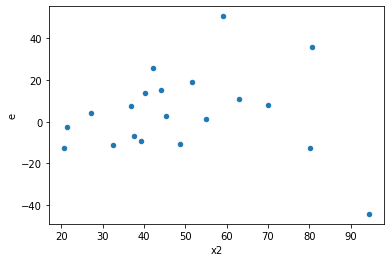

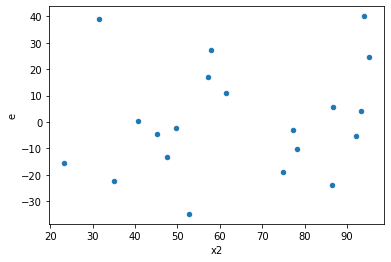

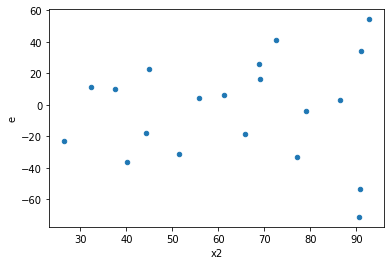

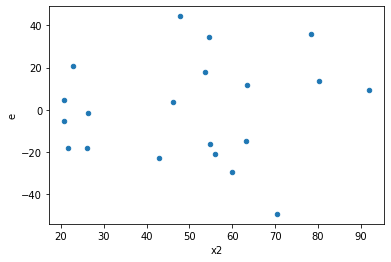

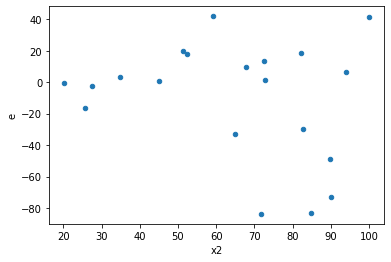

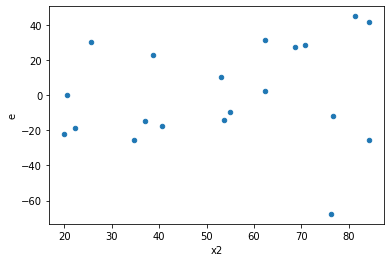

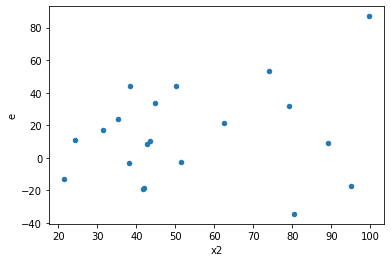

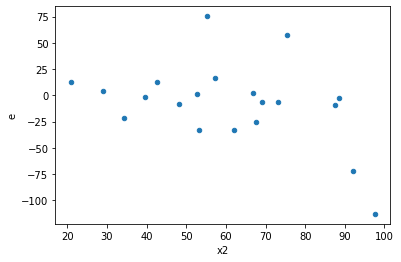

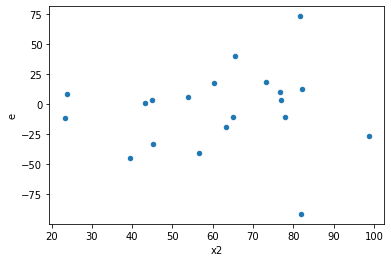

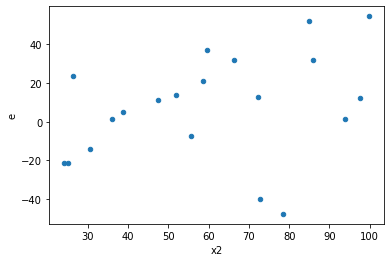

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,2788.40232006927,6809.323275467556,464.733720011545,1134.887212577926,2.4420160700836018,0.30155207781983795,0.849223961090081,0.15077603890991897,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2363.1936860494043,3055.0817140504955,393.8656143415674,509.1802856750826,1.2927766911724166,0.7631614359755567,0.6184192820122216,0.3815807179877784,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,2965.3409488430284,4183.452758113001,494.22349147383807,697.2421263521669,1.4107830533771293,0.6866413713758193,0.6566793143120904,0.34332068568790963,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,2245.178724566158,8355.141095643983,374.1964540943597,1392.5235159406639,3.721370153843084,0.13477267864500808,0.932613660677496,0.06738633932250404,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,3266.626321127284,5028.3217438428965,544.4377201878807,838.0536239738161,1.539301177891589,0.6135968303799388,0.6932015848100306,0.3067984151899694,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,918.4136983563976,2286.6962664671114,153.06894972606628,381.1160444111852,2.4898324911305285,0.2914870390880002,0.8542564804559999,0.1457435195440001,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,1294.4861237442174,5354.864010483222,215.74768729070288,892.477335080537,4.136671619927933,0.10782929082397019,0.9460853545880149,0.053914645411985096,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,342.2041898430486,1359.0193613214142,57.0340316405081,226.50322688690235,3.9713697308753764,0.11761681685763059,0.9411915915711847,0.058808408428815295,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,1011.2884747201639,2047.7867067937593,168.54807912002732,341.29778446562653,2.0249283542565903,0.41164752860402,0.79417623569799,0.20582376430201,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,2788.40232006927,6809.323275467556,464.733720011545,1134.887212577926,2.4420160700836018,0.30155207781983795,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,6646.4022371456085,813.237878900713,1107.7337061909348,135.53964648345217,0.1223576079033654,0.021860873157362203,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,7186.786411921892,2105.467211246327,1197.7977353203153,350.91120187438787,0.2929636544859113,0.16074812555893467,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2363.1936860494043,3055.0817140504955,393.8656143415674,509.1802856750826,1.2927766911724166,0.7631614359755567,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,2965.3409488430284,4183.452758113001,494.22349147383807,697.2421263521669,1.4107830533771293,0.6866413713758193,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,2245.178724566158,8355.141095643983,374.1964540943597,1392.5235159406639,3.721370153843084,0.13477267864500808,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,3845.5740174178477,2951.401326419329,640.9290029029746,491.9002210698882,0.7674800466852226,0.7561664860614394,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,3266.626321127284,5028.3217438428965,544.4377201878807,838.0536239738161,1.539301177891589,0.6135968303799388,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,918.4136983563976,2286.6962664671114,153.06894972606628,381.1160444111852,2.4898324911305285,0.2914870390880002,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      801
Reject005=0 : Heteroscedasticity    199
Name: Result_test, dtype: int64